In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

In [9]:
df = pd.read_csv('data/BankMarketing/bank-additional-full.csv', encoding='utf-8')
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [10]:
df.profile_report(title='BankMarketing - Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df.drop_duplicates(inplace=True)

In [15]:
for col in df.dtypes[df.dtypes == 'object'].index:
    df[col] = df[col].astype('category').cat.codes

In [16]:
df.dtypes

age                 int64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month                int8
day_of_week          int8
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome             int8
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                    int8
dtype: object

In [4]:
df.fillna(df.median(), inplace=True)

C:\Users\ishih\AppData\Local\Temp\ipykernel_12804\3604797450.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


In [20]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(32940, 20)
(8236, 20)


In [21]:
models = [linear_model.LogisticRegression(),
          neighbors.KNeighborsClassifier(),
          svm.SVC(),
          naive_bayes.GaussianNB(),
          tree.DecisionTreeClassifier(max_depth=3),
          ensemble.RandomForestClassifier(max_depth=3),
          ensemble.GradientBoostingClassifier()]

In [22]:
from scipy import stats
df_model_comp = pd.DataFrame()
result = []
for model in models:
    dic = dict()
    print(model.__class__.__name__)
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
    result.append(y_pred.copy())
dic['モデル名'] = 'ensemble'
y_pred_ans, _ = stats.mode(np.array(result),axis=0)
y_pred_ans = y_pred_ans[0]
dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred_ans)
dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred_ans)
dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred_ans)
dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred_ans)
df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

LogisticRegression


C:\Users\ishih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier
SVC
GaussianNB
DecisionTreeClassifier
RandomForestClassifier
GradientBoostingClassifier


モデル名  Accuracy(訓練)  Precision(訓練)  Recall(訓練)  \
0          LogisticRegression      0.907620       0.654085    0.394166   
1        KNeighborsClassifier      0.930419       0.732989    0.608242   
2                         SVC      0.896995       0.634796    0.216751   
3                  GaussianNB      0.844809       0.382177    0.596735   
4      DecisionTreeClassifier      0.908561       0.601116    0.576666   
5      RandomForestClassifier      0.900000       0.774473    0.167246   
6  GradientBoostingClassifier      0.921858       0.693898    0.556864   
7                    ensemble      0.921858       0.693898    0.556864   

     F1(訓練)  Accuracy(テスト)  Precision(テスト)  Recall(テスト)   F1(テスト)  
0  0.491902       0.912822        0.672932     0.396896  0.499303  
1  0.664814       0.908694        0.595908     0.516630  0.553444  
2  0.323160       0.901651        0.646497     0.225055  0.333882  
3  0.465942       0.852598        0.389675     0.610865  0.475820  
4  0.588637       0.911122        0.592391     0.604213  0.598244  
5  0.275088       0.904322        0.796875     0.169623  0.279707  
6  0.617874       0.921200        0.671642     0.548780  0.604027  
7  0.617874       0.916100        0.693578     0.419069  0.522460

In [24]:
y_pred_ans[0]

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [22]:
X_train.dtypes[X_train.dtypes != 'uint8'].index

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'degree_p', 'workex',
       'etest_p', 'specialisation', 'mba_p', 'salary'],
      dtype='object')

In [25]:
from sklearn.preprocessing import StandardScaler

scaling_columns = X_train.dtypes[X_train.dtypes != 'uint8'].index
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [26]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    print(model.__class__.__name__)
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

LogisticRegression
KNeighborsClassifier
SVC
GaussianNB
DecisionTreeClassifier
RandomForestClassifier
GradientBoostingClassifier


モデル名  Accuracy(訓練)  Precision(訓練)  Recall(訓練)  \
0          LogisticRegression      0.909411       0.663058    0.409687   
1        KNeighborsClassifier      0.926988       0.750564    0.533851   
2                         SVC      0.919915       0.766618    0.422799   
3                  GaussianNB      0.844809       0.382177    0.596735   
4      DecisionTreeClassifier      0.908561       0.601116    0.576666   
5      RandomForestClassifier      0.900698       0.776722    0.175007   
6  GradientBoostingClassifier      0.921858       0.693898    0.556864   

     F1(訓練)  Accuracy(テスト)  Precision(テスト)  Recall(テスト)   F1(テスト)  
0  0.506451       0.914886        0.682396     0.416851  0.517550  
1  0.623925       0.905901        0.600316     0.421286  0.495114  
2  0.545016       0.914643        0.698603     0.388027  0.498931  
3  0.465942       0.852598        0.389675     0.610865  0.475820  
4  0.588637       0.911122        0.592391     0.604213  0.598244  
5  0.285652       0.904687        0.788177     0.177384  0.289593  
6  0.617874       0.921200        0.671642     0.548780  0.604027

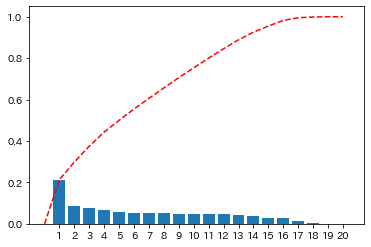

In [27]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

In [28]:
n = 11
columns=[f'PC{i+1}' for i in range(n)]
X_train_pca = pd.DataFrame(X_train_pca[:,:n], columns=columns)
X_test_pca = pd.DataFrame(X_test_pca[:,:n], columns=columns)

LogisticRegression
KNeighborsClassifier
SVC
GaussianNB
DecisionTreeClassifier
RandomForestClassifier
GradientBoostingClassifier


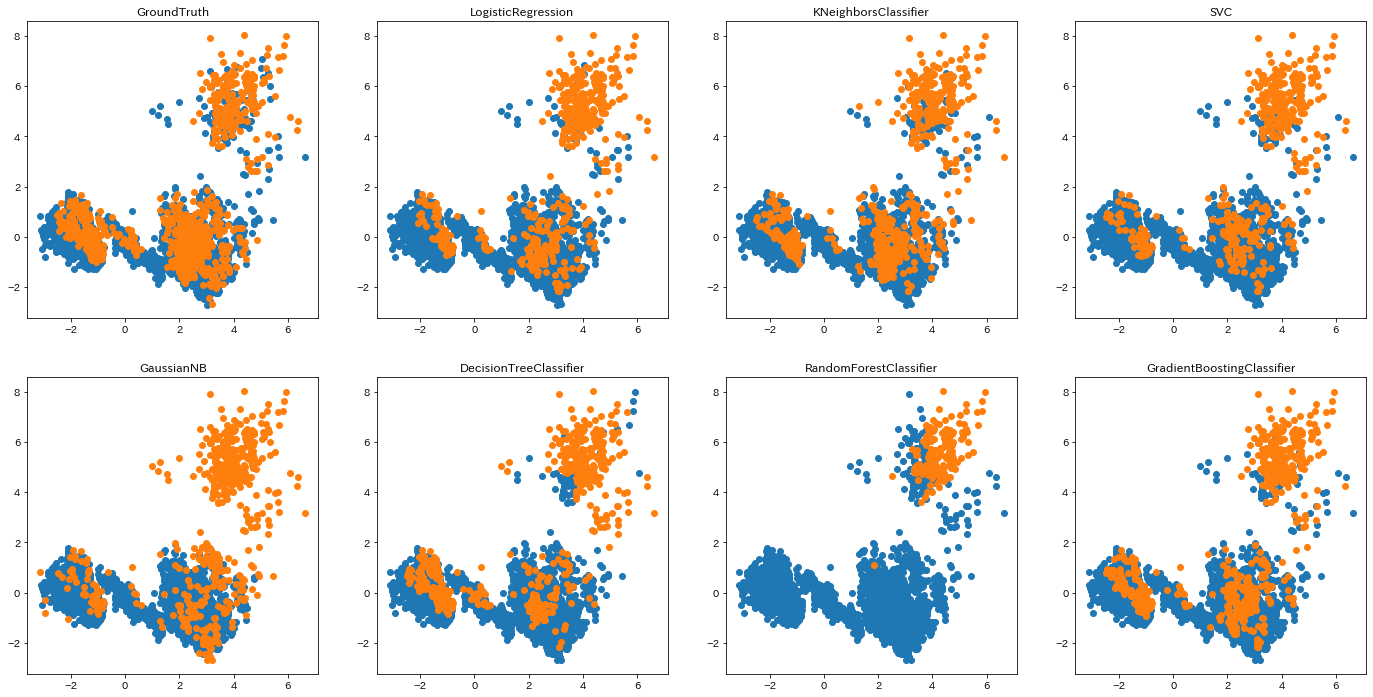

モデル名  Accuracy(訓練)  Precision(訓練)  Recall(訓練)  \
0          LogisticRegression      0.906406       0.655714    0.368477   
1        KNeighborsClassifier      0.925926       0.751065    0.519133   
2                         SVC      0.913843       0.735217    0.375970   
3                  GaussianNB      0.893746       0.551499    0.339577   
4      DecisionTreeClassifier      0.900546       0.607761    0.347873   
5      RandomForestClassifier      0.897116       0.729551    0.147980   
6  GradientBoostingClassifier      0.914967       0.691489    0.452234   

     F1(訓練)  Accuracy(テスト)  Precision(テスト)  Recall(テスト)   F1(テスト)  
0  0.471818       0.911122        0.667984     0.374723  0.480114  
1  0.613924       0.900559        0.568595     0.381375  0.456536  
2  0.497521       0.913065        0.702174     0.358093  0.474302  
3  0.420338       0.897644        0.553153     0.340355  0.421414  
4  0.442478       0.902258        0.589319     0.354767  0.442907  
5  0.246051       0.898373        0.699387     0.126386  0.214085  
6  0.546837       0.911608        0.647959     0.422395  0.511409

In [39]:
df_model_comp = pd.DataFrame()

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(24.0,12.0))
ax = ax.flatten()
for j in np.unique(y_test):
    X_tmp = X_test_pca[y_test.values == j]
    ax[0].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
ax[0].set_title('GroundTruth')

for i, model in enumerate(models):
    dic = dict()
    print(model.__class__.__name__)
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train_pca,y_train)
    y_pred = model.predict(X_train_pca)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test_pca)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
    for j in np.unique(y_pred):
        X_tmp = X_test_pca[y_pred == j]
        ax[i+1].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
    ax[i+1].set_title(model.__class__.__name__)
plt.show()

df_model_comp

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy={0:X_train.shape[0], 1:X_train.shape[0]//3}, random_state = 40)
X_train_resampled_smoth, y_train_resampled_smoth = smote.fit_resample(X_train, y_train)

C:\Users\ishih\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (32940) in class 0 will be larger than the number of samples in the majority class (class #0 -> 29203)
  warnings.warn(


In [40]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    print(model.__class__.__name__)
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train_resampled_smoth,y_train_resampled_smoth)
    y_pred = model.predict(X_train_resampled_smoth)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train_resampled_smoth, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train_resampled_smoth, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train_resampled_smoth, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train_resampled_smoth, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

LogisticRegression
KNeighborsClassifier
SVC
GaussianNB
DecisionTreeClassifier
RandomForestClassifier
GradientBoostingClassifier


モデル名  Accuracy(訓練)  Precision(訓練)  Recall(訓練)  \
0          LogisticRegression      0.868443       0.770656    0.674499   
1        KNeighborsClassifier      0.944490       0.842997    0.956011   
2                         SVC      0.907445       0.798911    0.841621   
3                  GaussianNB      0.813115       0.611522    0.692168   
4      DecisionTreeClassifier      0.872883       0.766782    0.706375   
5      RandomForestClassifier      0.827573       0.773567    0.438707   
6  GradientBoostingClassifier      0.911384       0.808926    0.845173   

     F1(訓練)  Accuracy(テスト)  Precision(テスト)  Recall(テスト)   F1(テスト)  
0  0.719378       0.909786        0.573953     0.684035  0.624178  
1  0.895954       0.878218        0.459952     0.643016  0.536292  
2  0.819710       0.900073        0.531127     0.747228  0.620912  
3  0.649351       0.843371        0.382282     0.698448  0.494118  
4  0.735340       0.904565        0.549069     0.719512  0.622841  
5  0.559888       0.900559        0.555556     0.460089  0.503335  
6  0.826652       0.913793        0.586643     0.720621  0.646766

In [34]:
help(smote)

Help on SMOTE in module imblearn.over_sampling._smote.base object:

class SMOTE(BaseSMOTE)
 |  SMOTE(*, sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)
 |  
 |  Class to perform over-sampling using SMOTE.
 |  
 |  This object is an implementation of SMOTE - Synthetic Minority
 |  Over-sampling Technique as presented in [1]_.
 |  
 |  Read more in the :ref:`User Guide <smote_adasyn>`.
 |  
 |  Parameters
 |  ----------
 |  sampling_strategy : float, str, dict or callable, default='auto'
 |      Sampling information to resample the data set.
 |  
 |      - When ``float``, it corresponds to the desired ratio of the number of
 |        samples in the minority class over the number of samples in the
 |        majority class after resampling. Therefore, the ratio is expressed as
 |        :math:`\alpha_{os} = N_{rm} / N_{M}` where :math:`N_{rm}` is the
 |        number of samples in the minority class after resampling and
 |        :math:`N_{M}` is the number of samp